Se descarcă datele...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


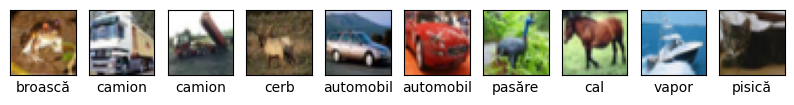

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Începe antrenarea...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.3490 - loss: 1.7575 - val_accuracy: 0.5405 - val_loss: 1.2602
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5584 - loss: 1.2400 - val_accuracy: 0.5842 - val_loss: 1.1639
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6234 - loss: 1.0687 - val_accuracy: 0.6327 - val_loss: 1.0451
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6633 - loss: 0.9548 - val_accuracy: 0.6722 - val_loss: 0.9424
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6948 - loss: 0.8736 - val_accuracy: 0.6745 - val_loss: 0.9186
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7110 - loss: 0.8251 - val_accuracy: 0.6843 - val_loss: 0.8944
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7273 - loss: 0.7692 - val_accuracy: 0.6797 - val_loss: 0.9232
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.

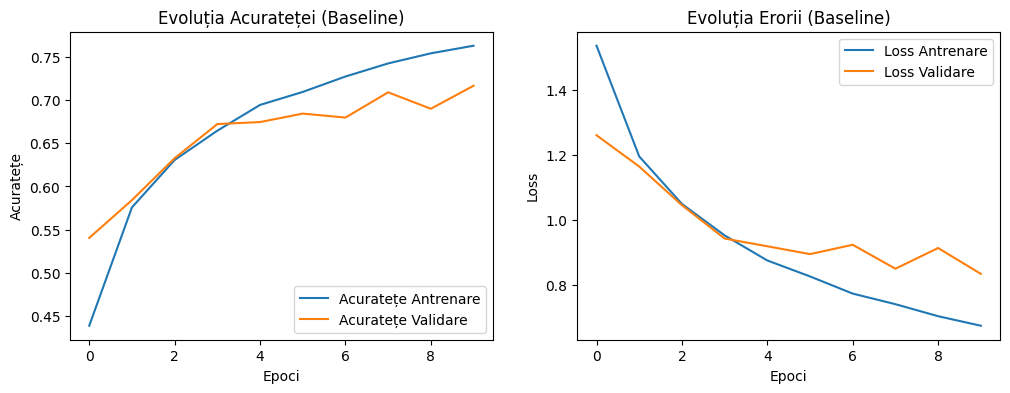

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# DATELE (EDA)
# setul de date CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizam pixelii sa fie intre 0 si 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['avion', 'automobil', 'pasăre', 'pisică', 'cerb',
               'câine', 'broască', 'cal', 'vapor', 'camion']

# afisam imaginile , 10 avem
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# MODELUL
# Construim o retea CNN  (Baseline)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 clase finale

# Compilam modelul
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 3. ANTRENAREA (Baseline - Fara AIMD inca)
print("Incepe antrenarea :")
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 4. REZULTATELE
plt.figure(figsize=(12, 4))

# Grafic
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acuratețe Antrenare')
plt.plot(history.history['val_accuracy'], label='Acuratețe Validare')
plt.xlabel('Epoci')
plt.ylabel('Acuratețe')
plt.legend(loc='lower right')
plt.title('Evoluția Acurateței (Baseline)')

# Grafic Pierdere (Loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Antrenare')
plt.plot(history.history['val_loss'], label='Loss Validare')
plt.xlabel('Epoci')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Evoluția Erorii (Baseline)')

plt.show()